In [1]:
# https://medium.com/ibm-data-science-experience/missing-data-conundrum-exploration-and-imputation-techniques-9f40abe0fd87
import numpy as np
import pandas as pd
import matplotlib
import missingno as msno
%matplotlib inline

In [2]:
df = pd.read_csv('enh.csv')
df.head()

,Unnamed: 0,aire_acond,antiguedad,bano_comp,bano_excus,bano_regad,bomba_agua,calefacc,calentador,chimenea,...,tot_hom,tot_integ,tot_muj,celular,tel_fijo,tv_paga,año,CVE_ENT,CVE_MUN,CVE_LOC
0,0,2,30,2,0,0,1,2,1,2,...,3,4,1,2,1,2,2014,1,1,1
1,1,2,30,2,0,0,1,2,1,2,...,2,6,4,1,1,2,2014,1,1,1
2,2,2,42,2,0,0,1,2,2,2,...,3,4,1,2,1,2,2015,1,1,1
3,3,2,42,2,0,0,1,2,2,2,...,2,6,4,1,1,2,2015,1,1,1
4,4,2,26,2,1,0,1,2,1,2,...,3,4,1,2,1,1,2014,1,1,1


In [3]:
df.drop(labels='Unnamed: 0', axis=1, inplace=True)

In [4]:
df_copy = df.copy()

In [5]:
df_copy.shape

(254928, 60)

In [6]:
df_copy = df_copy.astype('int64')

In [7]:
df_copy.replace({-1 : np.nan}, inplace=True)

In [8]:
missingdata_df = df_copy.columns[df_copy.isnull().any()].tolist()
missingdata_df

['antiguedad',
 'bano_comp',
 'bano_excus',
 'bano_regad',
 'combustible',
 'computador',
 'dotac_agua',
 'focos_ahor',
 'focos_inca',
 'internet',
 'mat_pisos',
 'sanit_agua',
 'tipo_viv',
 'uso_compar',
 'celular',
 'tel_fijo',
 'tv_paga']

The `msno.matrix` nullity matrix is a data-dense display which lets you quickly visually pick out patterns in data completion. 

The sparkline at right summarizes the general shape of the data completeness and points out the maximum and minimum rows.

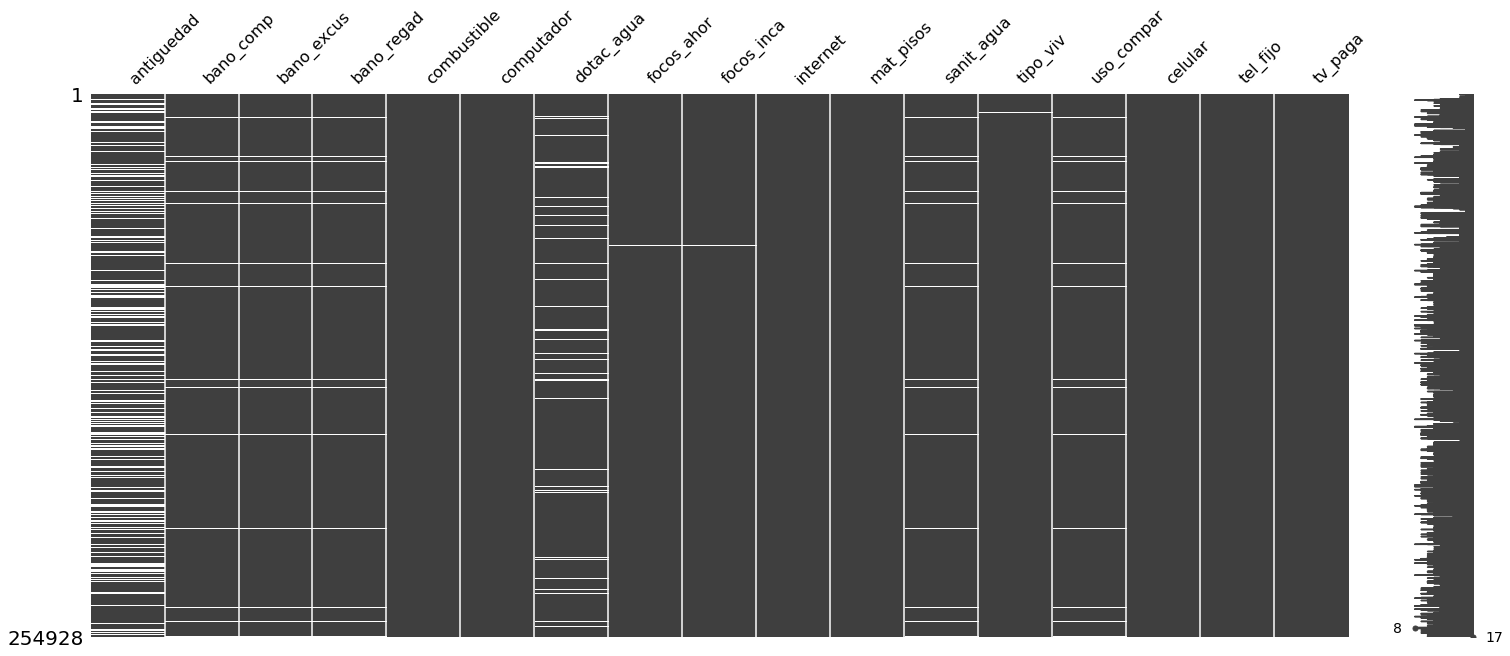

In [9]:
msno.matrix(df_copy[missingdata_df])

The missingno bar chart is a visualization of the data nullity. We log transformed the data on the y-axis to better visualize features with very large missing values.

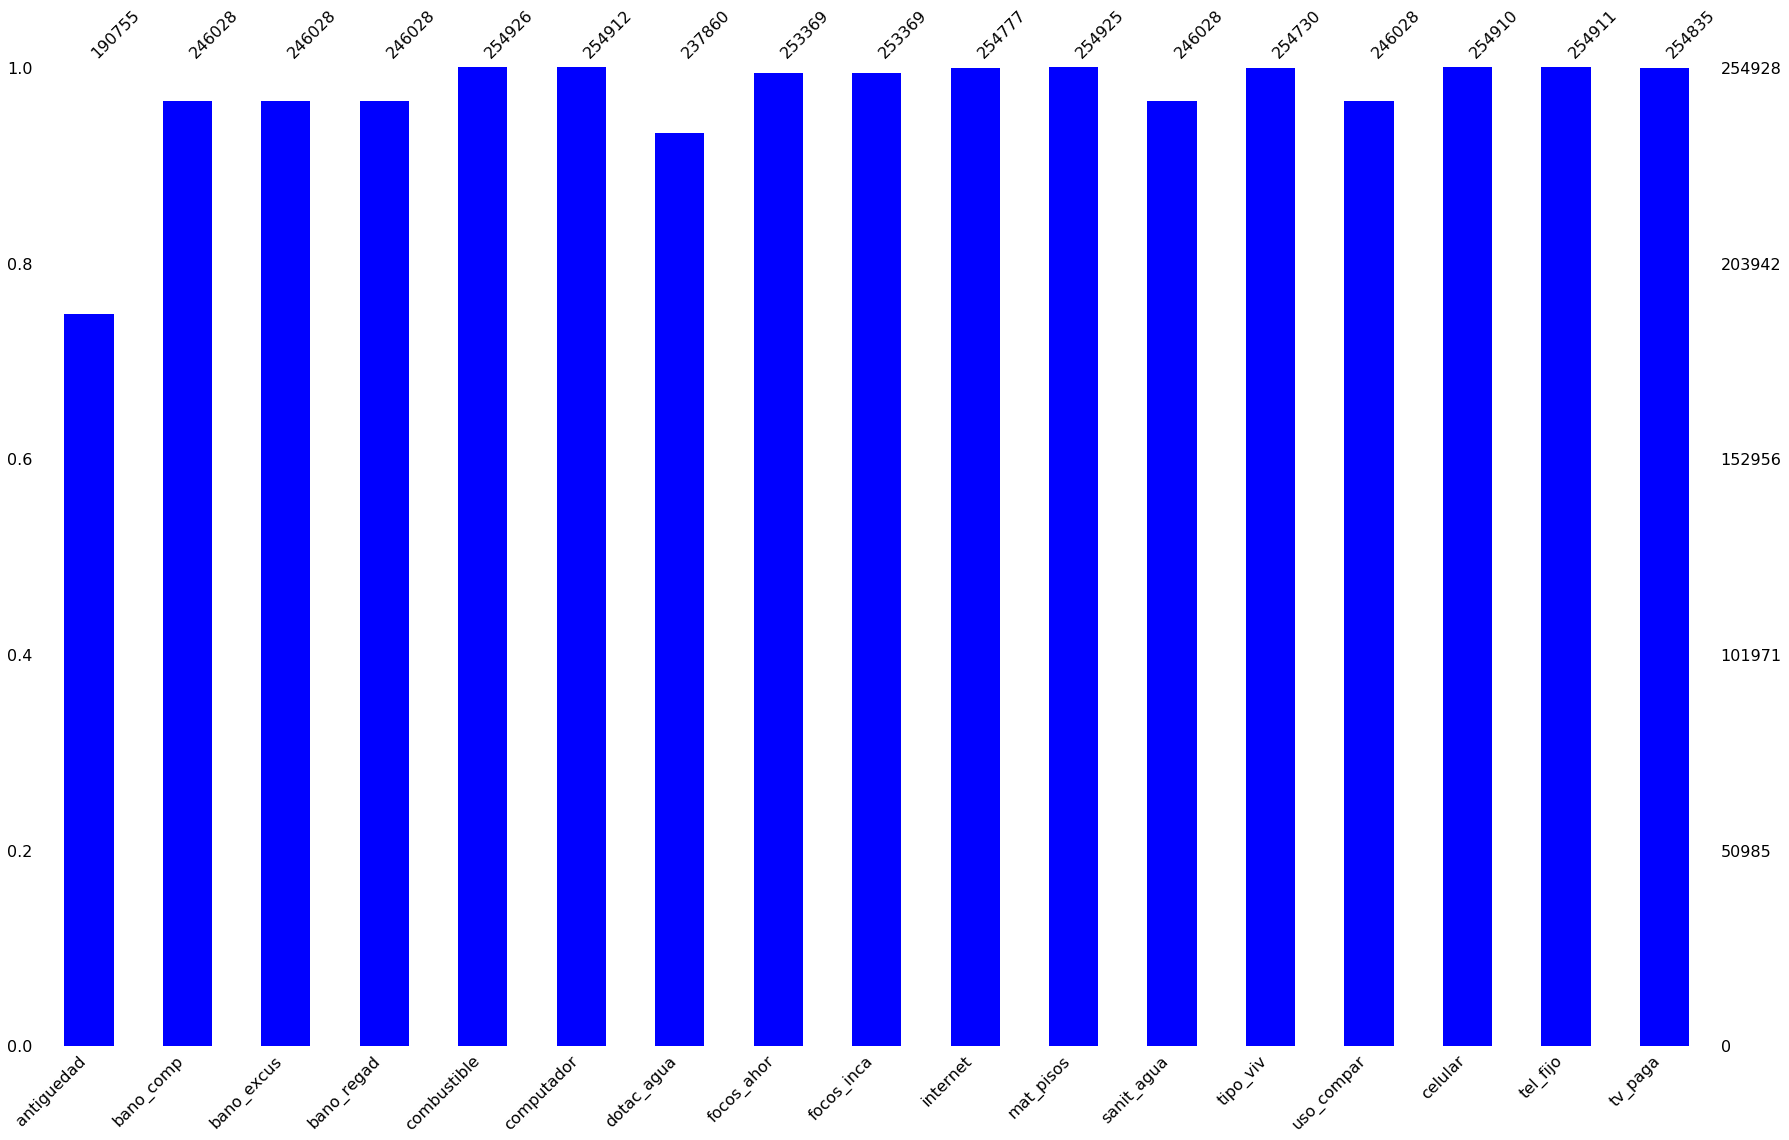

In [10]:
msno.bar(df_copy[missingdata_df], color="blue", log=False, figsize=(30,18))

The missingno correlation heatmap measures nullity correlation: how strongly the presence or absence of one variable affects the presence of another.

This map describes the degree of nullity relationship between the different features. The range of this nullity correlation is from $-1$ to $1$ $(-1 ≤ R ≤ 1)$. Features with no missing value are excluded in the heatmap. If the nullity correlation is very close to zero $(-0.05 < R < 0.05)$, no value will be displayed. Also, a perfect positive nullity correlation $(R=1)$ indicates when the first feature and the second feature both have corresponding missing values while a perfect negative nullity correlation, $(R=-1)$ means that one of the features is missing and the second is not missing.

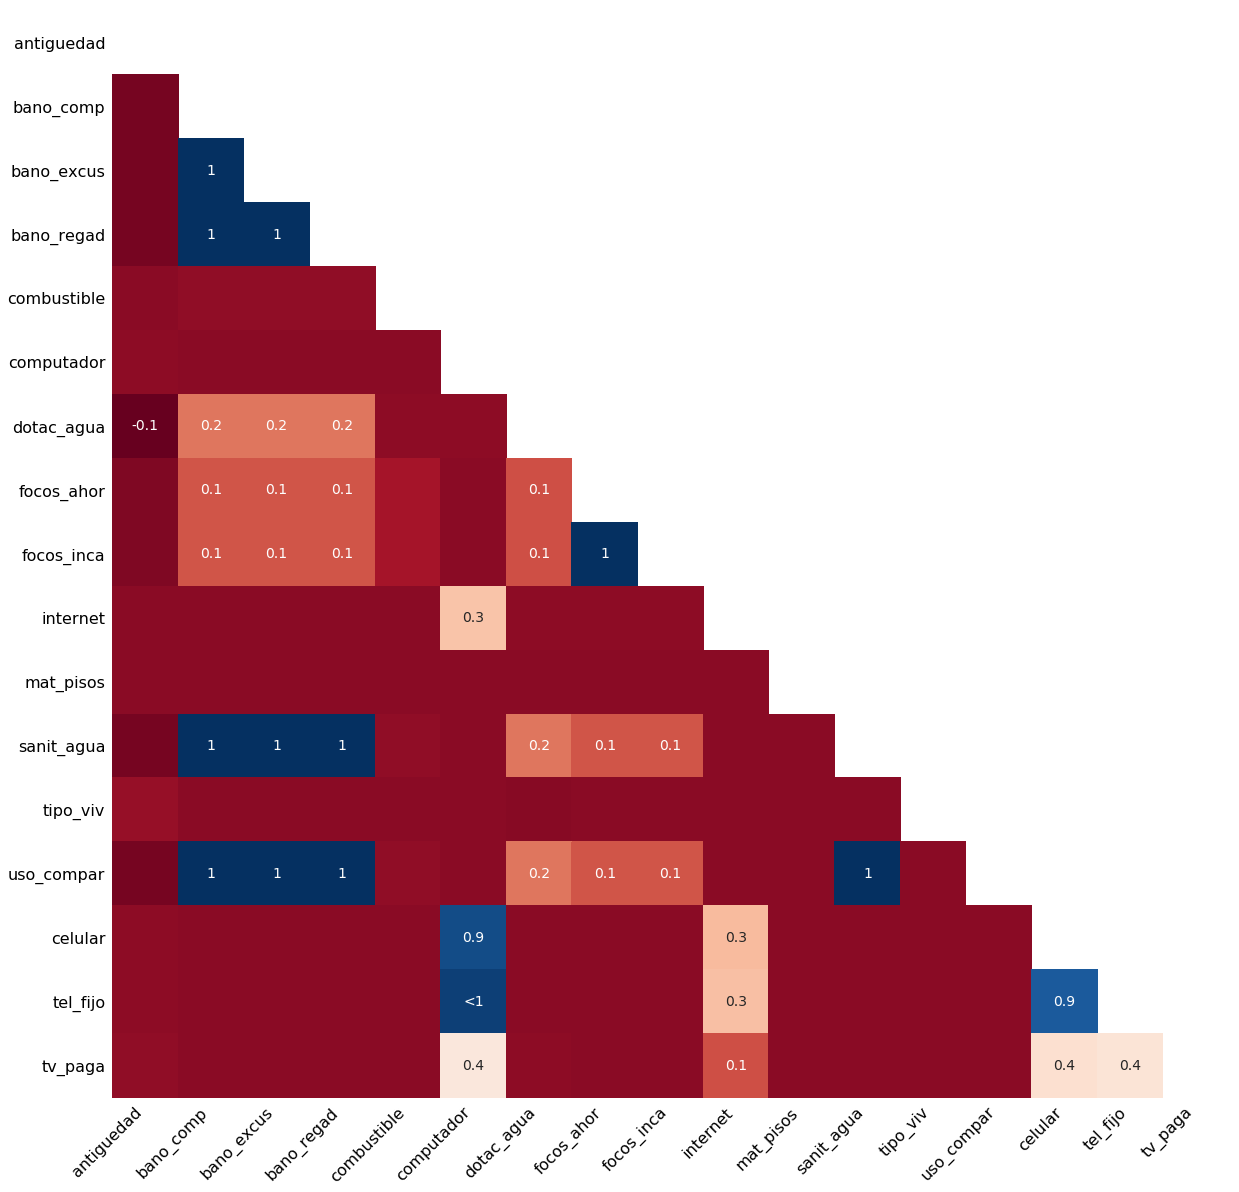

In [11]:
msno.heatmap(df_copy, figsize=(20,20))

The dendrogram uses a hierarchical clustering algorithm (courtesy of scipy) to bin variables against one another by their nullity correlation (measured in terms of binary distance). At each step of the tree the variables are split up based on which combination minimizes the distance of the remaining clusters. The more monotone the set of variables, the closer their total distance is to zero, and the closer their average distance (the y-axis) is to zero.

To interpret this graph, read it from a top-down perspective. Cluster leaves which linked together at a distance of zero fully predict one another's presence—one variable might always be empty when another is filled, or they might always both be filled or both empty, and so on. In this specific example the dendrogram glues together the variables which are required and therefore present in every record.

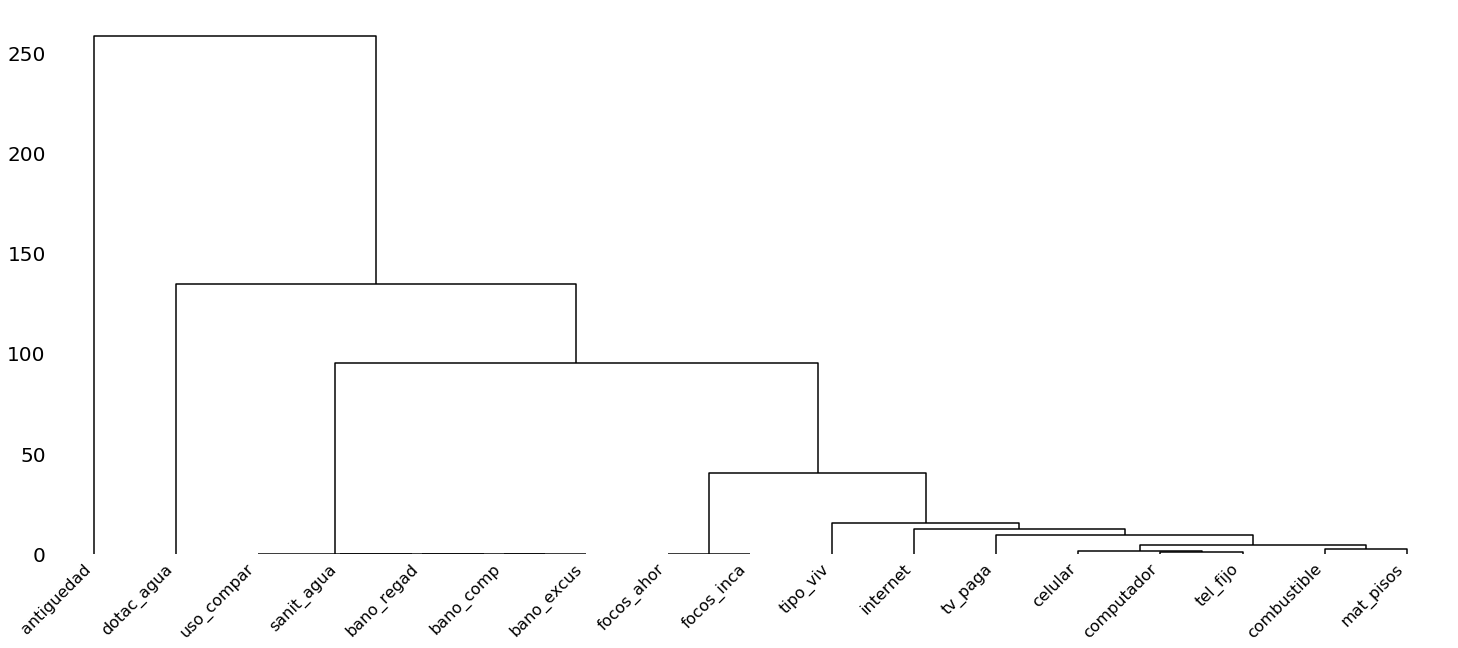

In [12]:
msno.dendrogram(df_copy[missingdata_df], orientation='top')

In [13]:
len(missingdata_df)

17

In [14]:
no_missingdata_df = df_copy.columns[(df_copy.isnull().any() != True)].tolist()
len(no_missingdata_df)

43

In [15]:
no_missingdata_df.remove('año')
no_missingdata_df.remove('CVE_ENT')
no_missingdata_df.remove('CVE_MUN')
no_missingdata_df.remove('CVE_LOC')
no_missingdata_df

['aire_acond',
 'bomba_agua',
 'calefacc',
 'calentador',
 'chimenea',
 'cisterna',
 'cocina',
 'const_bano',
 'const_coci',
 'const_dorm',
 'cuart_dorm',
 'disp_agua',
 'disp_elect',
 'drenaje',
 'eli_basura',
 'est_socio',
 'excusado',
 'fregadero',
 'lavadero',
 'mat_pared',
 'mat_techos',
 'medidor_luz',
 'num_cuarto',
 'pileta',
 'regadera',
 'repar_agua',
 'repar_cabl',
 'repar_dren',
 'repar_pard',
 'repar_tech',
 'tam_loc',
 'tanque_gas',
 'tenencia',
 'tinaco_azo',
 'tot_hog',
 'huespedes',
 'tot_hom',
 'tot_integ',
 'tot_muj']

In [16]:
list_combustible = no_missingdata_df
list_combustible.append('combustible')
list_combustible

['aire_acond',
 'bomba_agua',
 'calefacc',
 'calentador',
 'chimenea',
 'cisterna',
 'cocina',
 'const_bano',
 'const_coci',
 'const_dorm',
 'cuart_dorm',
 'disp_agua',
 'disp_elect',
 'drenaje',
 'eli_basura',
 'est_socio',
 'excusado',
 'fregadero',
 'lavadero',
 'mat_pared',
 'mat_techos',
 'medidor_luz',
 'num_cuarto',
 'pileta',
 'regadera',
 'repar_agua',
 'repar_cabl',
 'repar_dren',
 'repar_pard',
 'repar_tech',
 'tam_loc',
 'tanque_gas',
 'tenencia',
 'tinaco_azo',
 'tot_hog',
 'huespedes',
 'tot_hom',
 'tot_integ',
 'tot_muj',
 'combustible']

In [17]:
df_copy[list_combustible].head()

,aire_acond,bomba_agua,calefacc,calentador,chimenea,cisterna,cocina,const_bano,const_coci,const_dorm,...,tam_loc,tanque_gas,tenencia,tinaco_azo,tot_hog,huespedes,tot_hom,tot_integ,tot_muj,combustible
0,2.0,1.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,...,1.0,1.0,4.0,1.0,1.0,0.0,3.0,4.0,1.0,3.0
1,2.0,1.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,...,1.0,1.0,4.0,1.0,1.0,0.0,2.0,6.0,4.0,3.0
2,2.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,...,1.0,2.0,2.0,1.0,1.0,0.0,3.0,4.0,1.0,3.0
3,2.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,...,1.0,2.0,2.0,1.0,1.0,0.0,2.0,6.0,4.0,3.0
4,2.0,1.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,...,1.0,2.0,4.0,2.0,1.0,0.0,3.0,4.0,1.0,3.0


## Prueba k-NN `combustible`

In [18]:
df_copy.combustible.unique()

array([ 3.,  4.,  1.,  6.,  5.,  2., nan])

In [19]:
df_copy.combustible.nunique()

6

In [31]:
from fancyimpute import KNN

Using TensorFlow backend.


In [34]:
df_numeric = df_copy.as_matrix()

/Users/jacoboleon/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [ ]:
df_filled = pd.DataFrame(KNN(6).complete(df_numeric))

In [ ]:
df_filled.head()